# 1. Vectorise the train and test data

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.tsv.zip',sep='\t')
train_data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

We can see that the text of the reviews are stored in the "Phrase" column and the ratings are stored in the "Sentiment" column. Let's obtain the different review ratings:


In [3]:
set(train_data['Sentiment'])

{0, 1, 2, 3, 4}

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_train = tfidf_vectorizer.fit_transform(train_data['Phrase'])

In [6]:
test_data = pd.read_csv('test.tsv.zip',sep='\t')
test_data.head()

PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine

In [7]:
tfidf_test = tfidf_vectorizer.transform(test_data['Phrase'])

# 2. Cluster Analysis

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(tfidf_train)

In [9]:
train_data['Cluster'] = kmeans.labels_
train_data.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  Cluster  
0          1        2  
1          2        2  
2          2        1  
3          2        1  
4          2        1

Let's count the cluster sizes

In [10]:
for cluster_id in range(10):
    print("Size of cluster %i:" % cluster_id)
    print(len(train_data[train_data.Cluster==cluster_id]))

Size of cluster 0:
4596
Size of cluster 1:
135595
Size of cluster 2:
1676
Size of cluster 3:
2334
Size of cluster 4:
562
Size of cluster 5:
1213
Size of cluster 6:
5106
Size of cluster 7:
2750
Size of cluster 8:
1309
Size of cluster 9:
919


And now, let's obtain the word clouds.

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

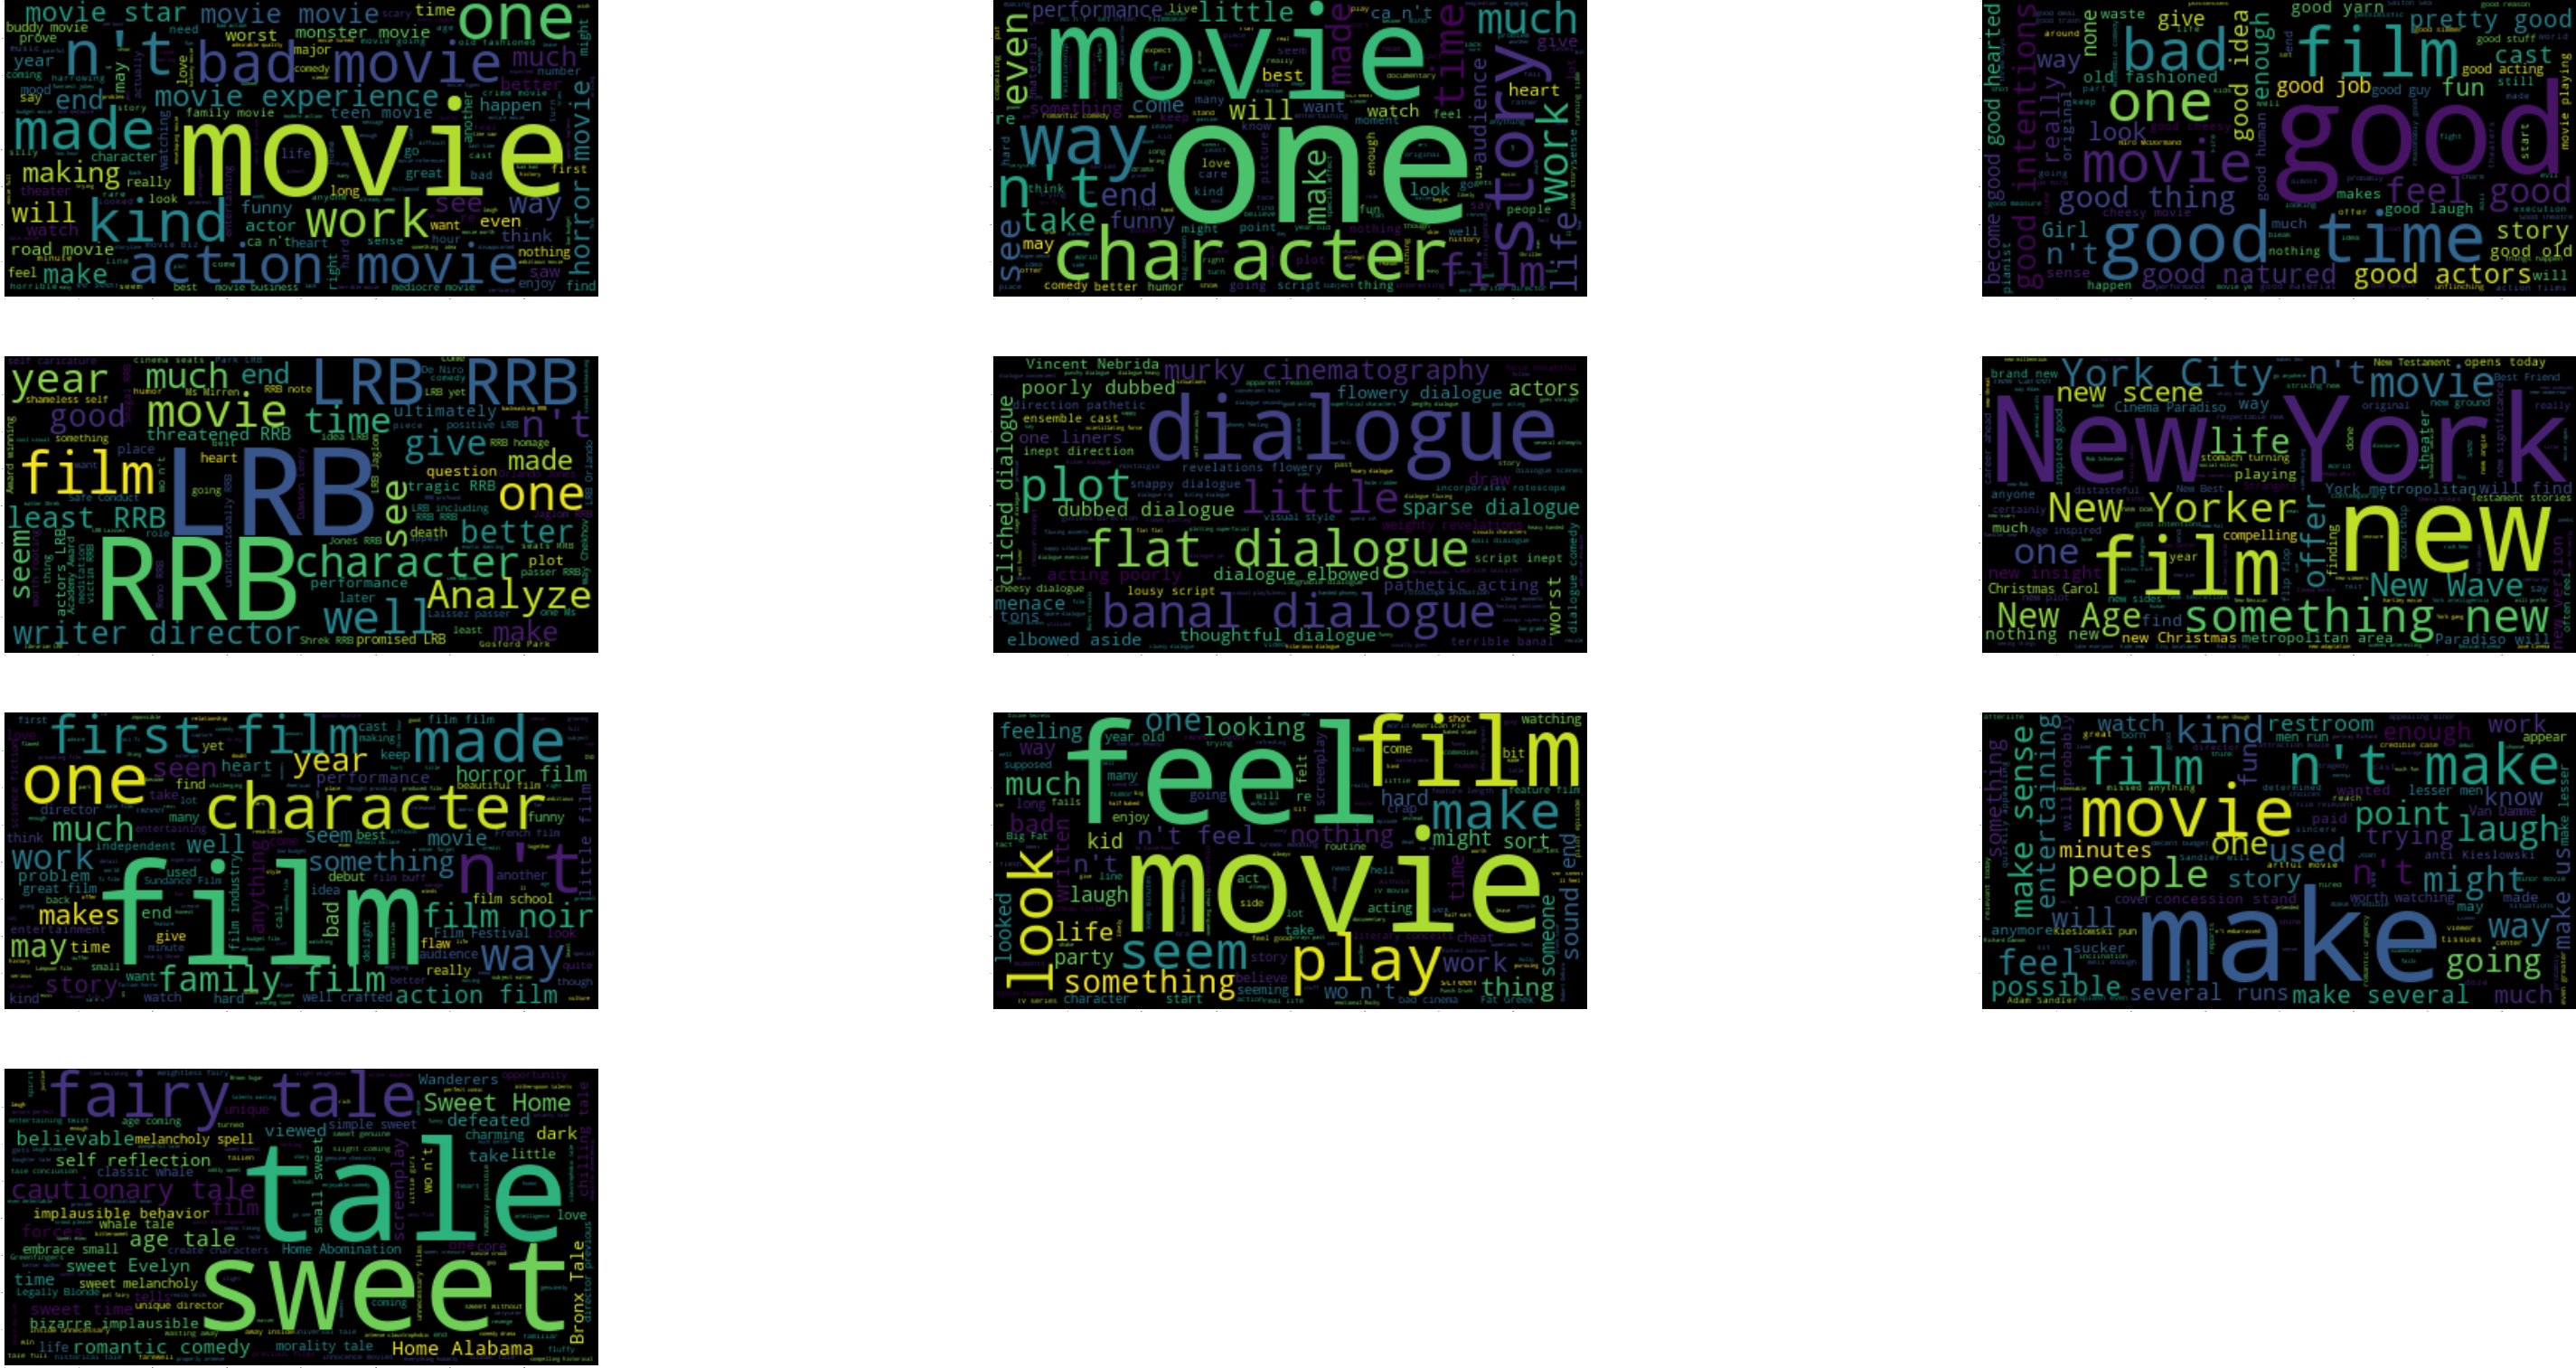

In [12]:
plt.figure(figsize=(400,200), dpi=10)
for cluster_id in range(10):
    plt.subplot(4, 3, cluster_id+1)
    text = ' '.join(train_data[train_data.Cluster==cluster_id].Phrase)
    wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')

Looking at the word clouds, it seems that we need to add the word "movie" to the list of stop words. Anyway, let's obtain the cluster IDs of the test set and find the word clouds.
   

In [13]:
test_data['Cluster'] = kmeans.predict(tfidf_test)
test_data.head()

PhraseId  SentenceId                                             Phrase  \
0    156061        8545  An intermittently pleasing but mostly routine ...   
1    156062        8545  An intermittently pleasing but mostly routine ...   
2    156063        8545                                                 An   
3    156064        8545  intermittently pleasing but mostly routine effort   
4    156065        8545         intermittently pleasing but mostly routine   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1

In [14]:
for cluster_id in range(10):
    print("Size of cluster %i in test data:" % cluster_id)
    print(len(test_data[test_data.Cluster==cluster_id]))

Size of cluster 0 in test data:
1722
Size of cluster 1 in test data:
58143
Size of cluster 2 in test data:
726
Size of cluster 3 in test data:
857
Size of cluster 4 in test data:
191
Size of cluster 5 in test data:
417
Size of cluster 6 in test data:
1950
Size of cluster 7 in test data:
1237
Size of cluster 8 in test data:
656
Size of cluster 9 in test data:
393


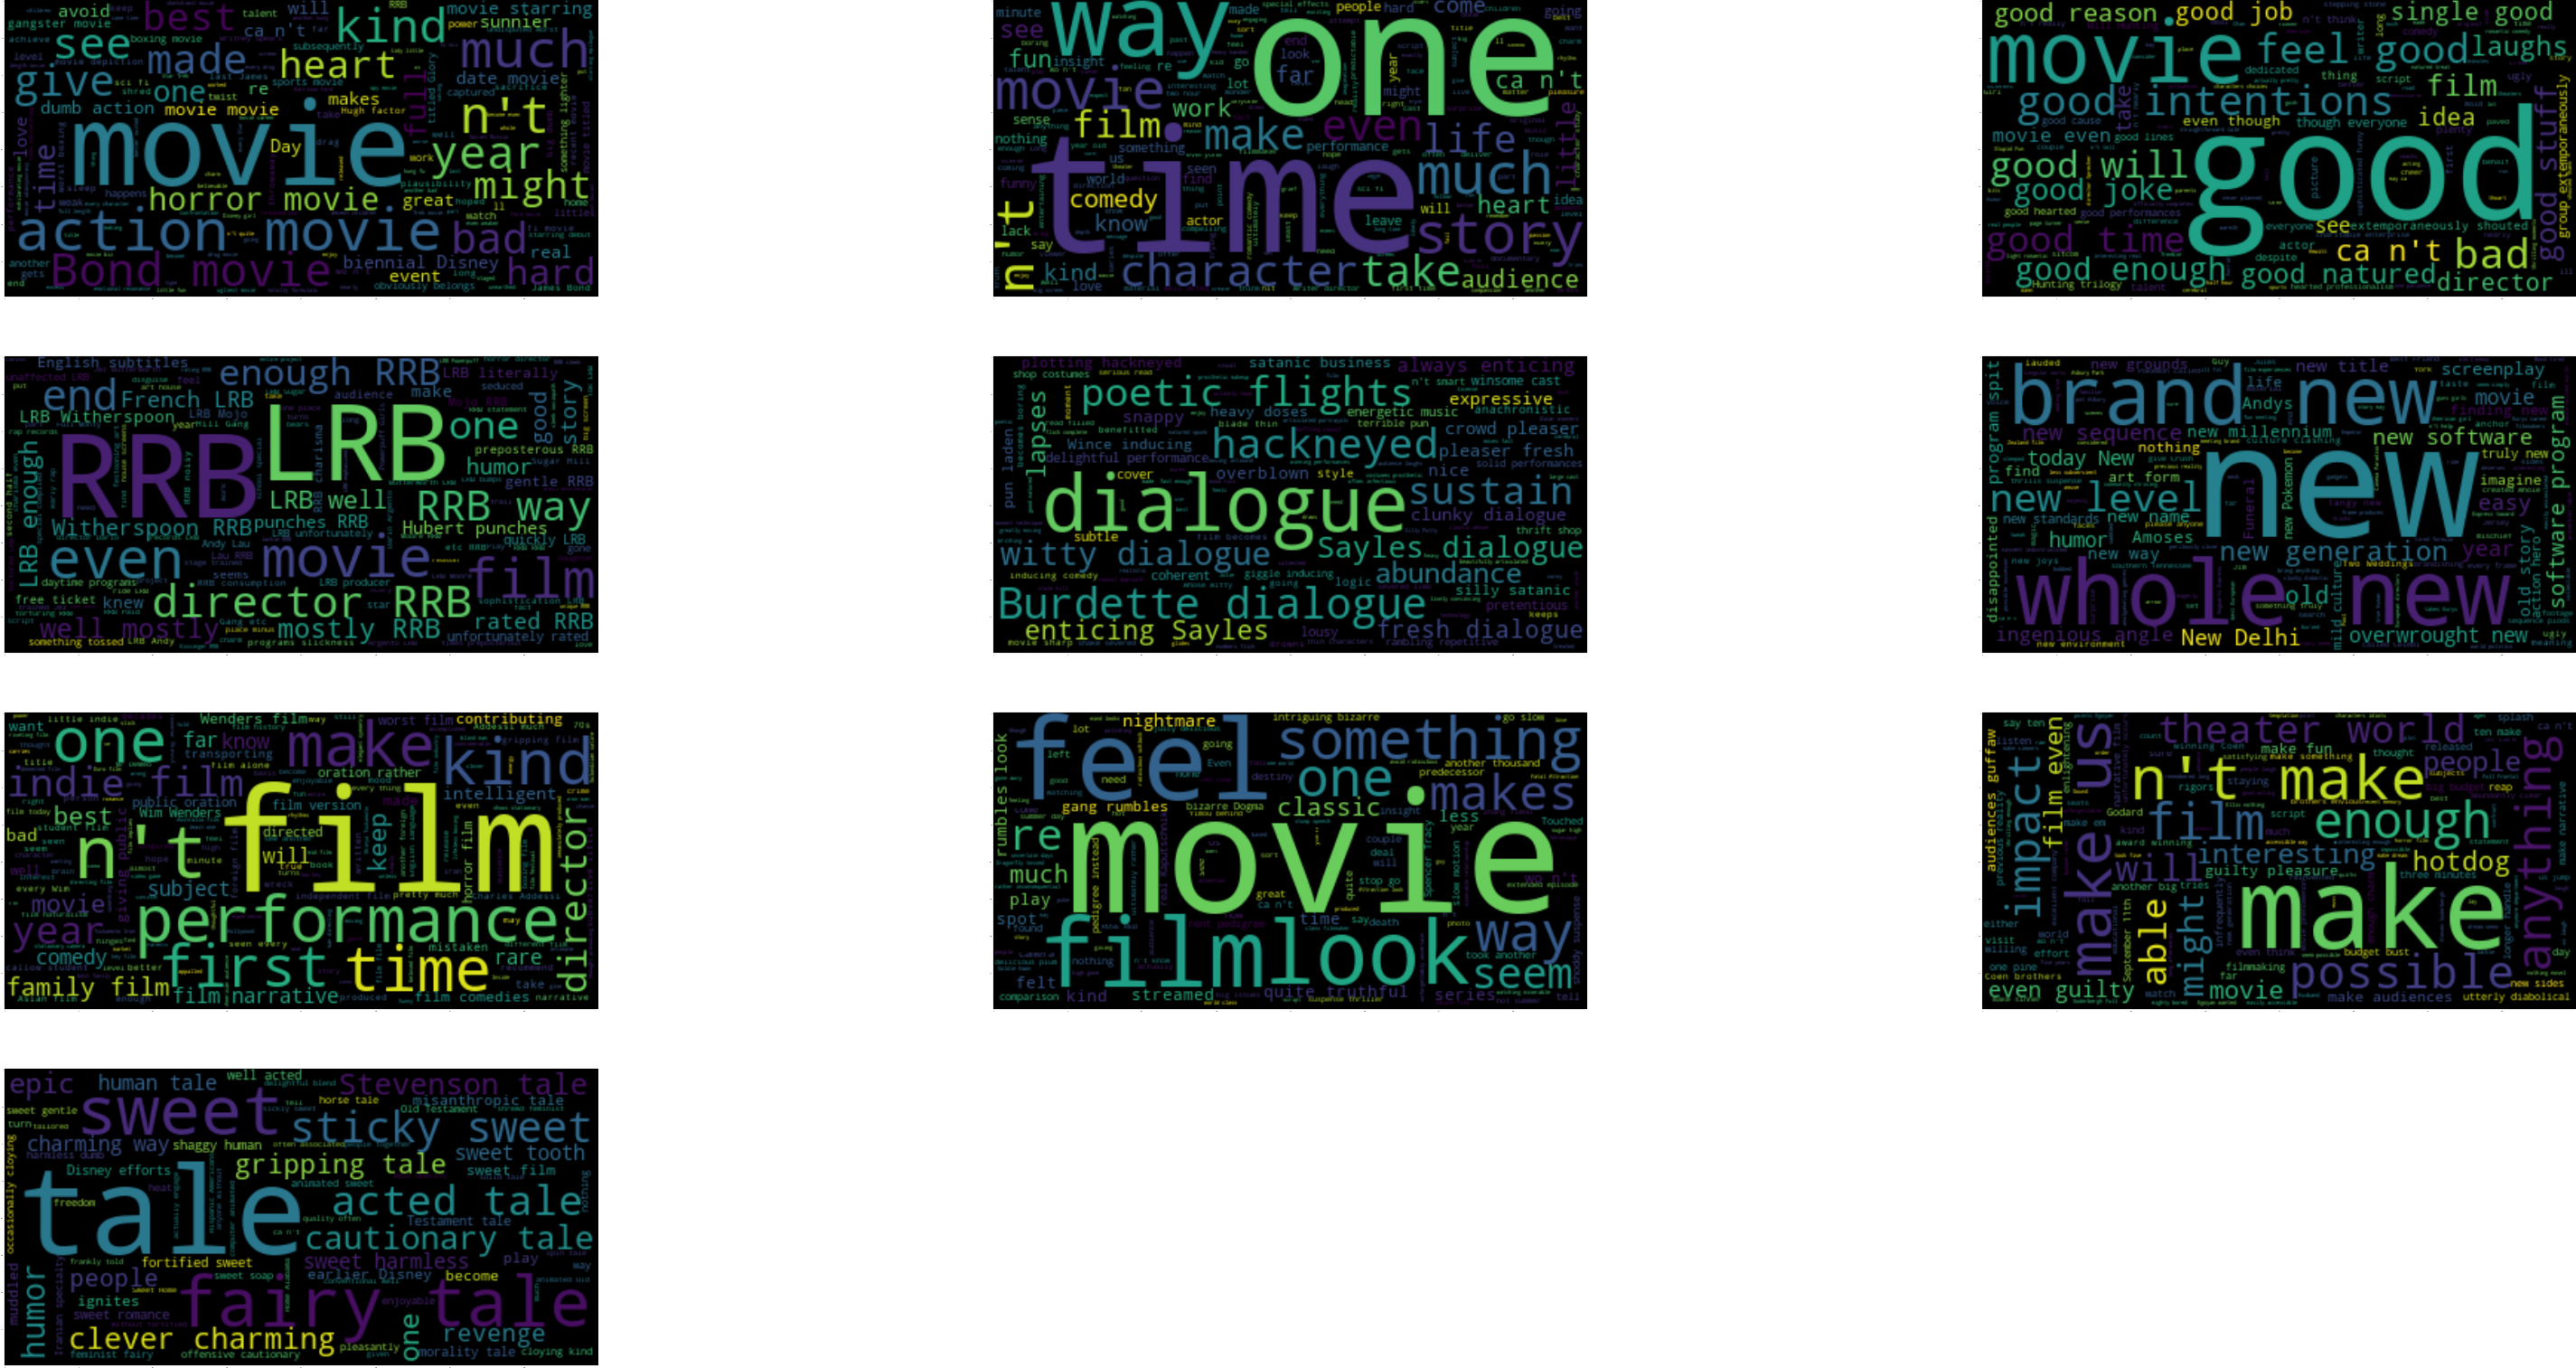

In [15]:
plt.figure(figsize=(400,200), dpi=10)
for cluster_id in range(10):
    plt.subplot(4, 3, cluster_id+1)
    text = ' '.join(test_data[test_data.Cluster==cluster_id].Phrase)
    wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')

We can see that the word clouds of the train and test data are not very different, so they may be a fairly accurate representation of the contents of the clusters.

# 3. Topic Modelling

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english")
count_test = count_vectorizer.fit_transform(test_data['Phrase'])

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn

In [18]:
lda_model = LatentDirichletAllocation(n_components=10,
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1 
                                      )

In [19]:
lda_output = lda_model.fit_transform(count_test)

In [20]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, count_test, count_vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  11.148166
6       0.648955  71.707100       2        1  10.164926
5      71.019684   9.971006       3        1  10.163733
2       3.785981  33.185135       4        1   9.974615
8     -42.666500  -9.222070       5        1   9.936891
1      -3.621689 -43.526516       6        1   9.879838
0      -3.632402  -4.171708       7        1   9.833928
7     -36.584400  35.804413       8        1   9.802523
3      44.391380  50.615383       9        1   9.606030
9      40.235809 -31.591665      10        1   9.489348, topic_info=           Term         Freq        Total Category  logprob  loglift
3120       film  2417.000000  2417.000000  Default  30.0000  30.0000
5360      movie  2230.000000  2230.000000  Default  29.0000  29.0000
4775       like  1364.000000  1364.000000  Default  28.0000  28.0000
7850      story   968.000000   968.000000  Default  27.0000  27.0000
8336       time   885.000000   885.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2022      death   101.588016   102.439336  Topic10  -5.3638   2.3467
9216    writing    96.624724    97.476006  Topic10  -5.4139   2.3462
1867      crime    96.505102    97.356442  Topic10  -5.4151   2.3462
2260  direction    96.463034    97.314330  Topic10  -5.4155   2.3462
2539     easily    93.743909    94.595265  Topic10  -5.4441   2.3460

[337 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
160       4  0.994814    acted
161      10  0.997311   acting
162       9  0.998041   action
167       2  0.996539    actor
168       4  0.995943   actors
...     ...       ...      ...
9216     10  0.995117  writing
9218      4  0.992186  written
9243     10  0.996683     year
9246      3  0.997272    years
9254      2  0.996230    young

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 3, 9, 2, 1, 8, 4, 10])

Let's check the topic distribution of some of the documents.

In [21]:
lda_vectors = pd.DataFrame(lda_output)
lda_vectors.columns = ['Topic '+str(i) for i in range(lda_vectors.shape[1])]
lda_vectors.index = ['Document '+str(i) for i in range(lda_vectors.shape[0])]
lda_vectors.head()

Topic 0  Topic 1  Topic 2  Topic 3  Topic 4  Topic 5   Topic 6  \
Document 0    0.020    0.020    0.020    0.020    0.020    0.020  0.581488   
Document 1    0.020    0.020    0.020    0.020    0.020    0.020  0.581488   
Document 2    0.100    0.100    0.100    0.100    0.100    0.100  0.100000   
Document 3    0.020    0.020    0.020    0.020    0.020    0.020  0.581488   
Document 4    0.025    0.025    0.025    0.025    0.025    0.025  0.438397   

             Topic 7  Topic 8  Topic 9  
Document 0  0.258512    0.020    0.020  
Document 1  0.258512    0.020    0.020  
Document 2  0.100000    0.100    0.100  
Document 3  0.258512    0.020    0.020  
Document 4  0.361603    0.025    0.025

We observe that each document covers several topics, not just one. This is normal when the documents are fairly large, as some of these reviews are. It could also mean that the topics have large overlaps of words, but given the visualisation from piLDAvis, they do not seem to overlap much.

Now, let's print the top words for each topic, to get a sense of what the topics are about:

In [22]:
# Function from https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd
import numpy as np
def show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords.T

Topic 0      Topic 1    Topic 2      Topic 3   Topic 4  \
Word 0          like         time       good         self      film   
Word 1          work   characters       make       action       rrb   
Word 2         great       little   director         kind       lrb   
Word 3        screen         long       cast    character    comedy   
Word 4         heart          big     better        human       far   
Word 5         right          fun     family        sense     going   
Word 6   performance     audience        say      effects      seen   
Word 7    compelling      minutes      feels         true        ca   
Word 8          gets         kids   original      special     times   
Word 9         flick         hard     scenes      reality  watching   
Word 10       horror        takes  emotional        heavy     video   
Word 11      classic          lot     writer  intelligent        ll   
Word 12         role        silly     series       coming        ve   
Word 13         dull       pretty    viewers           mr      high   
Word 14       moving           tv      acted   production    laughs   
Word 15         lack  predictable      jokes   ultimately   history   
Word 16        place       things      level        genre    school   
Word 17        gives        think     actors        piece     worth   
Word 18        enjoy       clever        hit       second   subject   
Word 19         dead      exactly        eye         live    trying   

           Topic 5    Topic 6       Topic 7      Topic 8        Topic 9  
Word 0         way      movie          just        story           does  
Word 1       makes      funny  performances          bad           life  
Word 2        best      world           new        films           year  
Word 3      people      thing          look       movies         script  
Word 4    american   thriller           old         plot            man  
Word 5     picture      drama         quite        humor  entertainment  
Word 6       charm       come       moments         real         acting  
Word 7        star      music          mind       really      narrative  
Word 8         war      style          past         love      cinematic  
Word 9         wit      point      material    hollywood            end  
Word 10      years      actor          need  interesting   entertaining  
Word 11       half       play       feature         tale            day  
Word 12  adventure      young      suspense         know         minute  
Word 13       fans     simple         turns     romantic           away  
Word 14      sweet       slow          ends         feel         cinema  
Word 15     likely    looking        strong      theater          title  
Word 16   children    passion          open  documentary          novel  
Word 17      scene  filmmaker          love     dialogue         ending  
Word 18   charming        set          miss       comedy           home  
Word 19       fact   directed          john          did          comes